In [37]:
#19290116
#MOHAMMAD SHABIB
import numpy as np
from matplotlib import pyplot as plt

In [38]:
#train the data by predicting the result and edit the weight each time 
#until the accurecy is 100% or reachs the max. n_epochs 
def Train_Data(inputs, outputs, weights, l_rate = 0.1, n_epoch=100): 
    for epoch in range(1,n_epoch+1):
        if accuracy(inputs, outputs, weights) == 1.:
            break;
        for i in range(inputs.shape[0]):            
            delta_error =  outputs[i] - predict(inputs[i], weights)
            for j in range(len(weights)):
                weights[j] = weights[j] + l_rate*delta_error*inputs[i][j]
        
        plot(inputs, outputs,weights, "After %d Epochs"%epoch)
    return epoch

In [39]:
#predict the output based on the current weights 
def predict(inputs, weights):
    weighted_sum = 0
    for i, w in zip(inputs,weights ):
        weighted_sum += i*w
    return 1 if weighted_sum>= 0 else 0        

In [40]:
#check the accuracy.
def accuracy(inputs, outputs, weights):
    n_correct = 0
    for i in range(inputs.shape[0]):
        if predict(inputs[i], weights) == outputs[i]:
            n_correct +=1
    
    return n_correct/len(outputs)

In [41]:
#This code wasn't writter by me,
#(I just edited some bits of code to suit my code)
def plot(inputs, outputs,weights,title="Prediction Matrix"):   
    fig,ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel("i1")
    ax.set_ylabel("i2")


    map_min=0.0
    map_max=1.1
    y_res=0.001
    x_res=0.001
    ys=np.arange(map_min,map_max,y_res)
    xs=np.arange(map_min,map_max,x_res)
    zs=[]
    for cur_y in np.arange(map_min,map_max,y_res):
        for cur_x in np.arange(map_min,map_max,x_res):
            zs.append(predict([1.0,cur_x,cur_y],weights))
    xs,ys=np.meshgrid(xs,ys)
    zs=np.array(zs)
    zs = zs.reshape(xs.shape)
    cp=plt.contourf(xs,ys,zs,levels=[-1,-0.0001,0,1],colors=('b','r'),alpha=0.1)


    c1_data=[[],[]]
    c0_data=[[],[]]
    for i in range(len(outputs)):
        cur_i1 = inputs[i][1]
        cur_i2 = inputs[i][2]
        cur_y  = outputs[i]
        if cur_y==1:
            c1_data[0].append(cur_i1)
            c1_data[1].append(cur_i2)
        else:
            c0_data[0].append(cur_i1)
            c0_data[1].append(cur_i2)

    plt.xticks(np.arange(0.0,1.1,0.1))
    plt.yticks(np.arange(0.0,1.1,0.1))
    plt.xlim(0,1.05)
    plt.ylim(0,1.05)

    c0s = plt.scatter(c0_data[0],c0_data[1],s=40.0,c='r',label='Class 0')
    c1s = plt.scatter(c1_data[0],c1_data[1],s=40.0,c='b',label='Class 1')

    plt.legend(fontsize=10,loc=1)
    plt.show()
    return

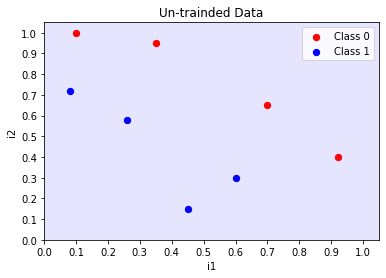

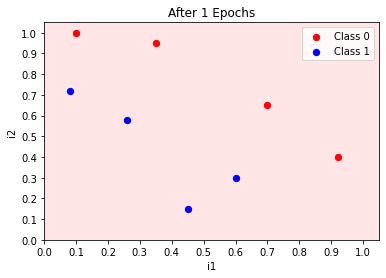

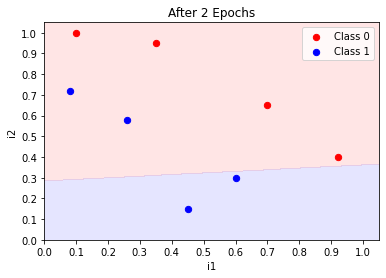

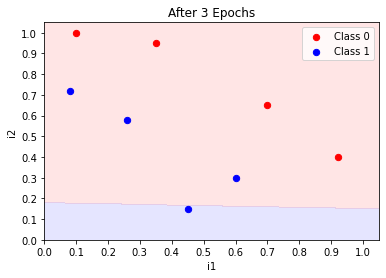

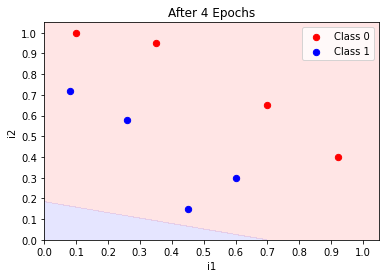

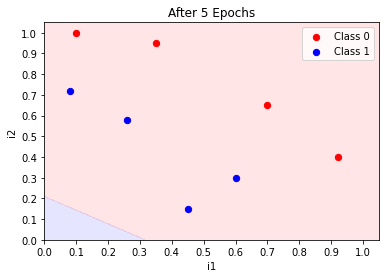

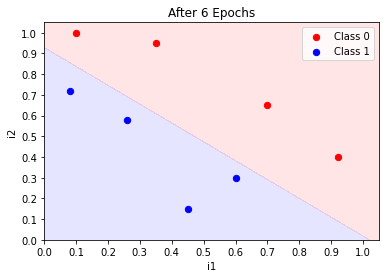

Intial Weights :  [0.69696246 0.44264908 0.18787114] 
Final Weights: [ 0.29696246 -0.29135092 -0.32012886]


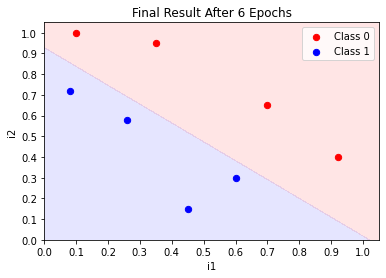

In [43]:
inputs = np.array([[0.08,0.72],
                   [0.1, 1],
                   [0.26,0.58],
                   [0.35,0.95],
                   [0.45,0.15],
                   [0.6,0.30],
                   [0.7, 0.65],
                   [0.92, 0.4]])
bias = np.ones((inputs.shape[0],1))
inputs = np.concatenate([bias,inputs ],axis=1) ## attaching the bias input

outputs = np.array([1, 0, 1, 0, 1, 1, 0, 0], dtype=float)

weights = np.random.rand(inputs.shape[1]) #I decided to make the weights random [0,1)
#weights = np.zeros(inputs.shape[1])

intial_weights = np.array(weights, copy=True) 

plot(inputs, outputs,weights, "Un-trainded Data")

final_epoch = Train_Data(inputs, outputs, weights, 0.2,100)

print("Intial Weights : ",intial_weights, "\nFinal Weights:", weights)

plot(inputs, outputs,weights, "Final Result After %d Epochs"%(final_epoch-1))
